# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('data/comprar_alquilar.csv')

In [3]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [5]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

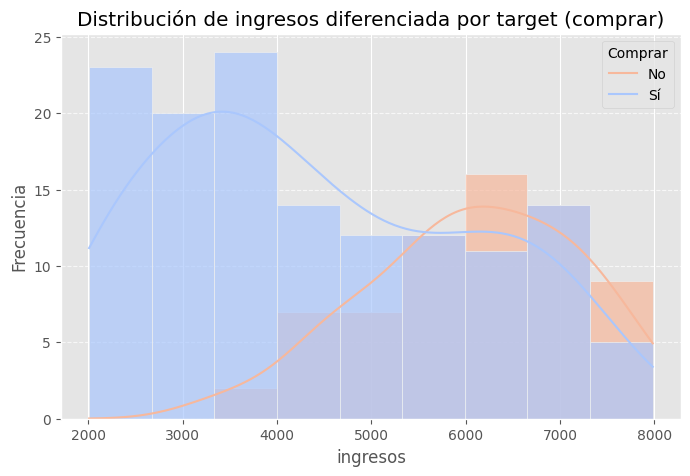

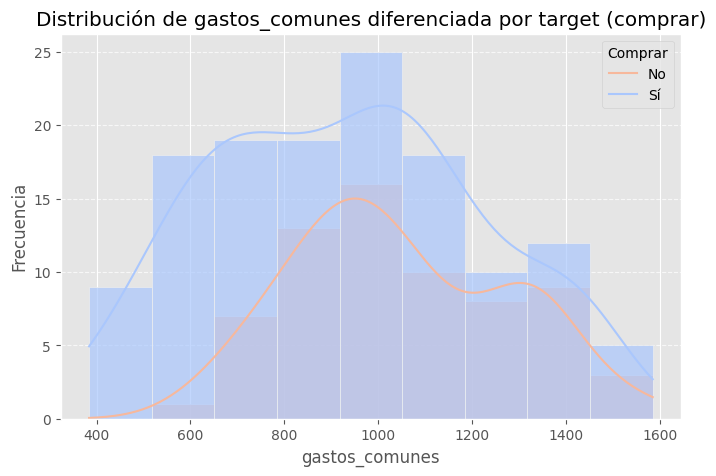

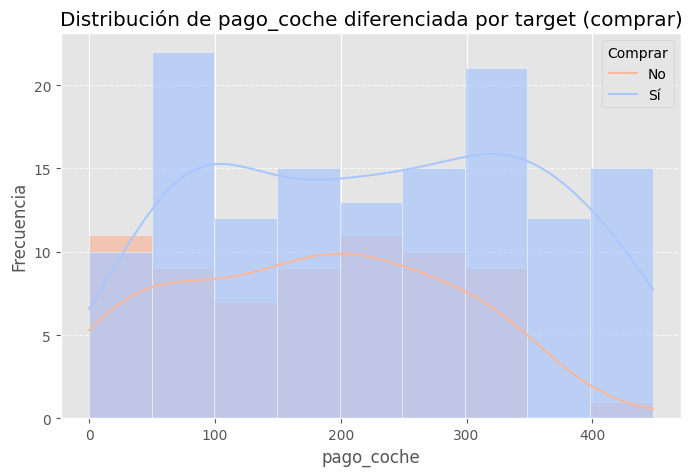

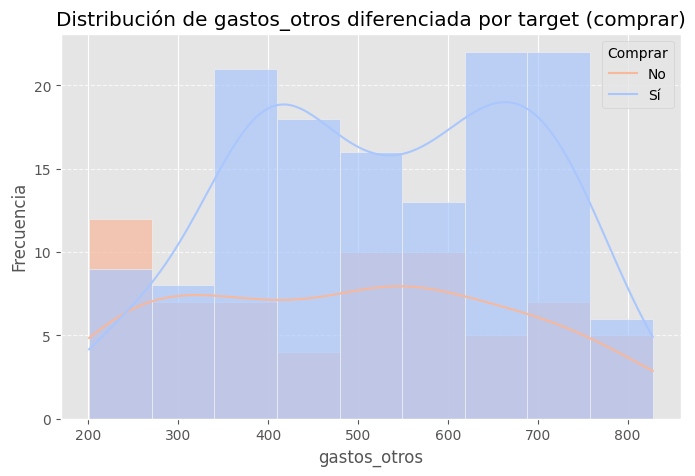

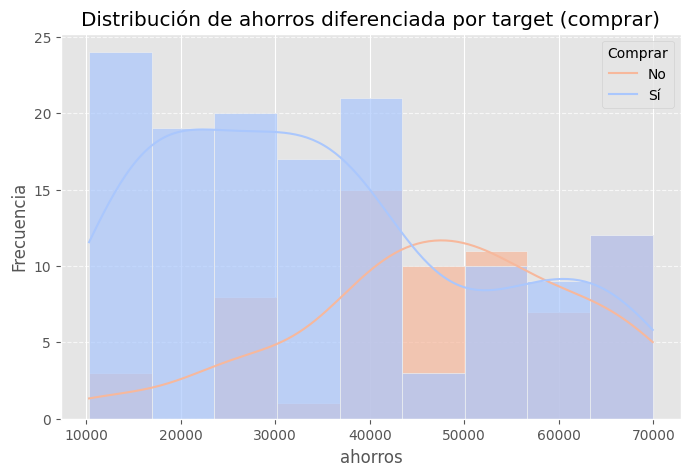

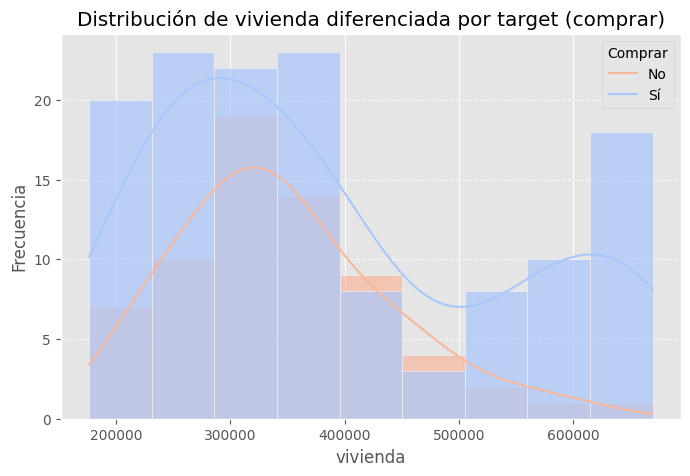

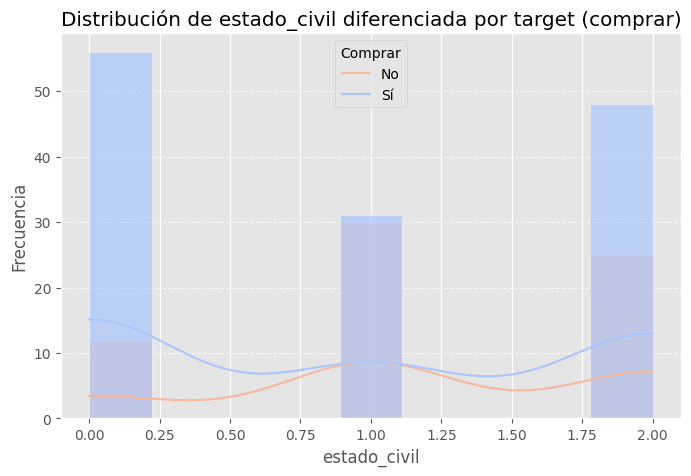

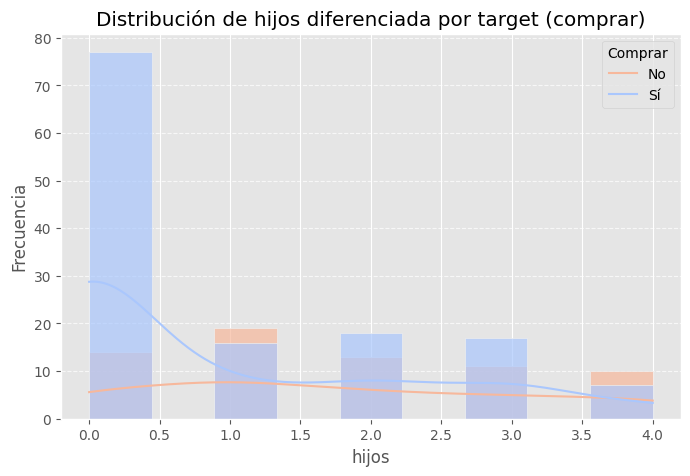

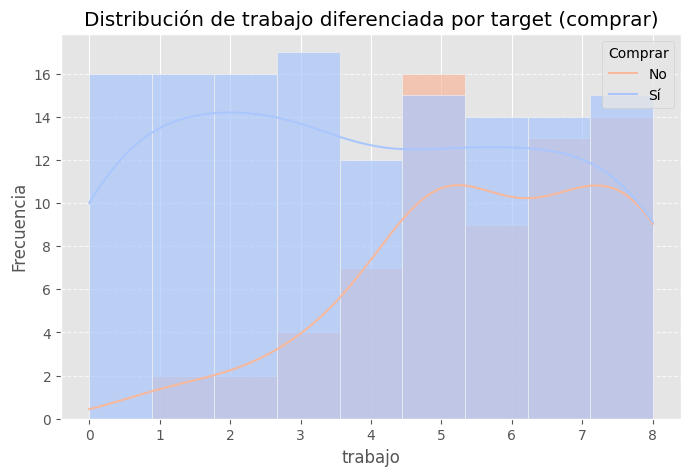

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables del dataframe
variables = df.columns[:-1]  # Todas las columnas menos 'comprar'

# Crear una gráfica por cada variable diferenciando por el target 'comprar'
for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=variable, hue='comprar', kde=True, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribución de {variable} diferenciada por target (comprar)')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.legend(title='Comprar', labels=['No', 'Sí'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [7]:
X = df.drop(columns=['comprar'])
y = df['comprar']

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [8]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Escalar las variables numéricas
df_scaled = scaler.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

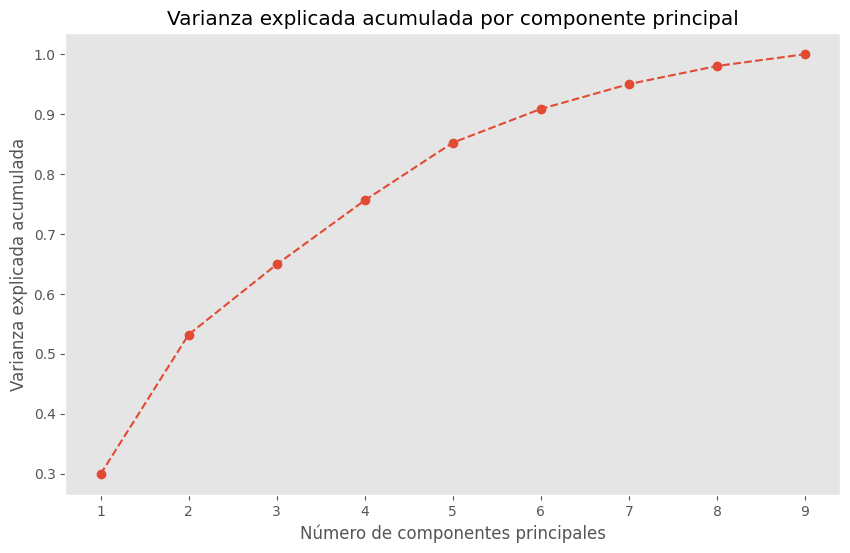

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,0.493720,0.318229,-0.123771,-0.111876,0.444650,0.462609,-0.252279,-0.259859,-0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,-0.091419,-0.363453,-0.516144,0.701986,0.191767,0.140513,-0.172885,0.112184,-0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA(n_components=9)
pca.fit_transform(df_scaled)

# Convertir el resultado a un DataFrame
pca_df = pd.DataFrame(
pca.components_,columns=X.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--'
)
plt.title('Varianza explicada acumulada por componente principal')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

# Mostrar las primeras filas del DataFrame de PCA
pca_df.head()

In [10]:
pca.n_components_

9

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


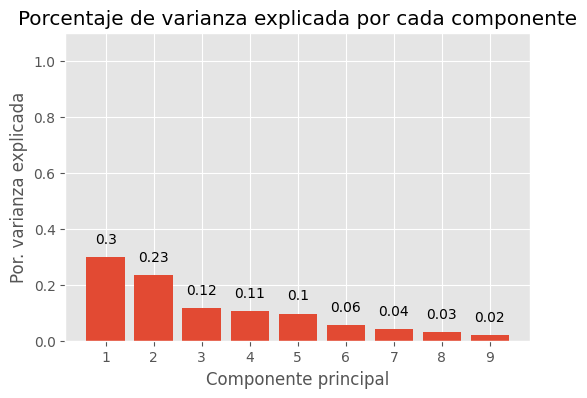

In [11]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(pca_df.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


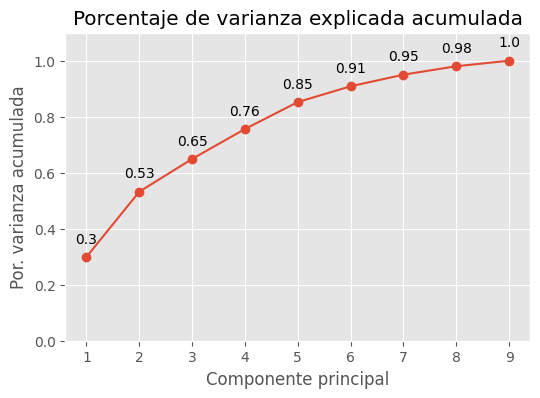

In [13]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(pca_df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(pca_df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

<Axes: >

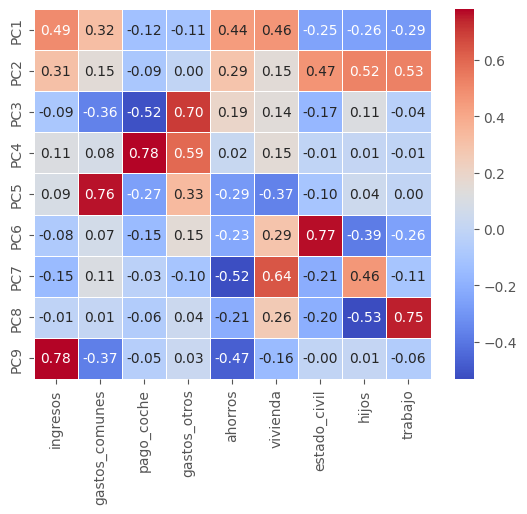

In [14]:
sns.heatmap((pca_df), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

Train Accuracy: 0.82
Test Accuracy: 0.67


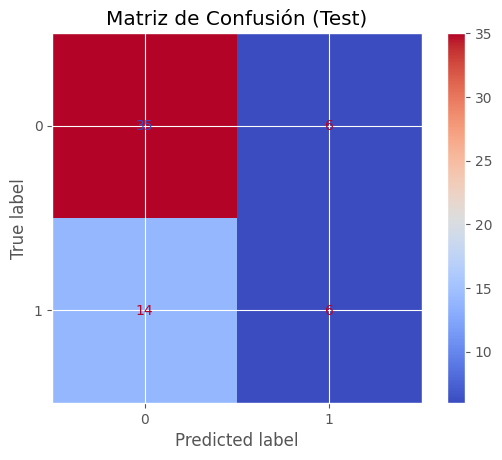

Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear', 'pca__n_components': 9}
Best Cross-Validation Accuracy: 0.93
Best Test Accuracy: 0.93
Modelo guardado como 'best_model_pca_comprar_alquilar.pkl'


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

# 1. Dividir en train y test
X = df.drop(columns=['comprar'])
y = df['comprar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])

# 3. Entrenar el modelo
pipeline.fit(X_train, y_train)

# 4. Predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# 5. Calcular accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap='coolwarm')
plt.title("Matriz de Confusión (Test)")
plt.show()

# 6. Optimización con GridSearchCV
param_grid = {
    'pca__n_components': [2, 3, 5, 7, 8, 9],
    'classifier__C': [0.1, 1, 10],  # Regularización para LogisticRegression
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluar el mejor modelo en test
best_test_pred = best_model.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_test_pred)
print(f"Best Test Accuracy: {best_test_accuracy:.2f}")

# 7. Guardar el mejor modelo
joblib.dump(best_model, 'best_model_pca_comprar_alquilar.pkl')
print("Modelo guardado como 'best_model_pca_comprar_alquilar.pkl'")
